In [1]:
import tensorflow as tf
from src.utils import *
from src.losses import *
from src.models import *
from src.dataset import *
from src.training import *
from src.learning_rate_schedulers import *

In [2]:
print('Tensorflow Version: {}'.format(tf.__version__))
set_memory_growth()

Tensorflow Version: 2.0.0
Detect 1 Physical GPUs, 1 Logical GPUs.


## Data Loader

In [3]:
tfrecord_creator = TFRecordCreator(
    '../DIV2K_train_HR/',
    '../DIV2K_train_LR_bicubic/X4'
)
tfrecord_creator.make_tfrecord_file('div2d_4x_bicubic.tfrecord')

100%|██████████| 800/800 [00:04<00:00, 161.20it/s]


In [4]:
dataloader = SRTfrecordDataset(256)
dataset = dataloader.get_dataset('./div2d_4x_bicubic.tfrecord', 8, 1024)
dataset

<PrefetchDataset shapes: ((8, 64, 64, 3), (8, 256, 256, 3)), types: (tf.float32, tf.float32)>

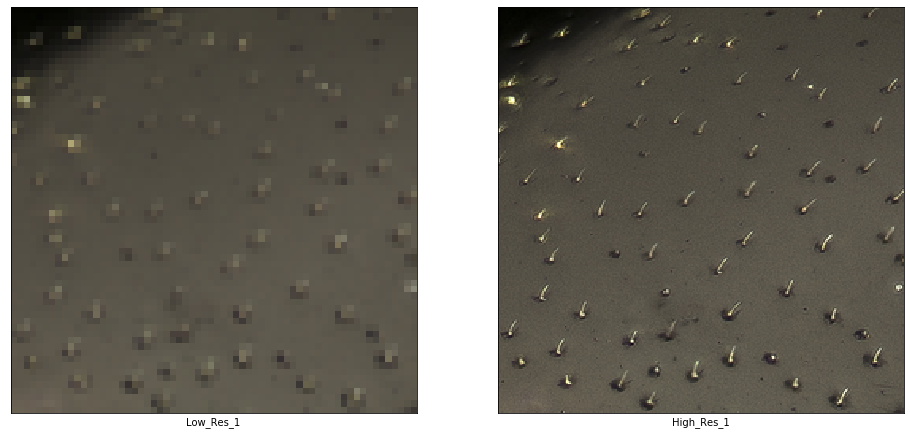

In [5]:
visualize_batch(dataset)

## Models

In [6]:
generator = Generator(64, 3)
generator.summary()

Model: "Generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv_first (Conv2D)             (None, 64, 64, 64)   1792        input_image[0][0]                
__________________________________________________________________________________________________
RRDB_trunk (Sequential)         (None, 64, 64, 64)   16546752    conv_first[0][0]                 
__________________________________________________________________________________________________
conv_trunk (Conv2D)             (None, 64, 64, 64)   36928       RRDB_trunk[0][0]                 
__________________________________________________________________________________________

In [7]:
discriminator = Discriminator(256, 3)
discriminator.summary()

Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv0_0 (Conv2D)             (None, 256, 256, 64)      1792      
_________________________________________________________________
conv0_1 (Conv2D)             (None, 128, 128, 64)      65536     
_________________________________________________________________
bn0_1 (BatchNormalization)   (None, 128, 128, 64)      256       
_________________________________________________________________
leaky_re_lu_348 (LeakyReLU)  (None, 128, 128, 64)      0         
_________________________________________________________________
conv1_0 (Conv2D)             (None, 128, 128, 128)     73728     
_________________________________________________________________
bn1_0 (BatchNormalization)   (None, 128, 128, 128)   

## Training

In [8]:
learning_rate = MultiStepLR(float(2e-4), [200000, 400000, 600000, 800000], 0.5)
gen_optimizer = tf.keras.optimizers.Adam(
    learning_rate=learning_rate,
    beta_1=0.9, beta_2=0.99
)

In [9]:
pixel_loss = PixelLoss()

In [ ]:
checkpoint, checkpoint_manager, generator, optimizer = pretrain(
    dataset, generator, gen_optimizer, pixel_loss
)

0it [00:00, ?it/s]

Training from scratch....


70it [01:15,  2.83it/s]